In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [3]:
df = pd.read_csv('C:/Users/lenovo/Downloads/individual+household+electric+power+consumption.zip' ,sep = ';', low_memory = False , parse_dates = {'Datetime': ['Date', 'Time']} )

In [4]:
df.set_index('Datetime', inplace = True)
df.sort_index(inplace = True)

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
print(pd.infer_freq(df.index))# get the frequency of time rnage 

min


In [7]:
# Define the expected frequency, e.g., '1H' for hourly, '1T' for minutely
expected_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='1T')
missing_timestamps = expected_range.difference(df.index)

print("Number of missing timestamps:", len(missing_timestamps))
print(missing_timestamps)


Number of missing timestamps: 0
DatetimeIndex([], dtype='datetime64[ns]', freq='min')


In [8]:
print(df.shape)
print(df.dtypes)

(2075259, 7)
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [9]:
# convert  object data types  into float (numeric)
object_columns = df.select_dtypes(include = 'object').columns
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors = 'coerce')

print(df.dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


## Data Exploration

In [10]:
# checking for missing values
print(df.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [11]:
print("\nMissing values Percentage:\n ", df.isnull().sum()/ len(df) * 100)


Missing values Percentage:
  Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [12]:
# Descriotive statistics
print('\nDescriptive Statistics:\n', df.describe())


Descriptive Statistics:
        Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  


## Data Cleaning

In [13]:
# impute missing values using median for numerical columns
numerical_columns = df.select_dtypes(include = ['float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [14]:
df.index.duplicated().sum()

0

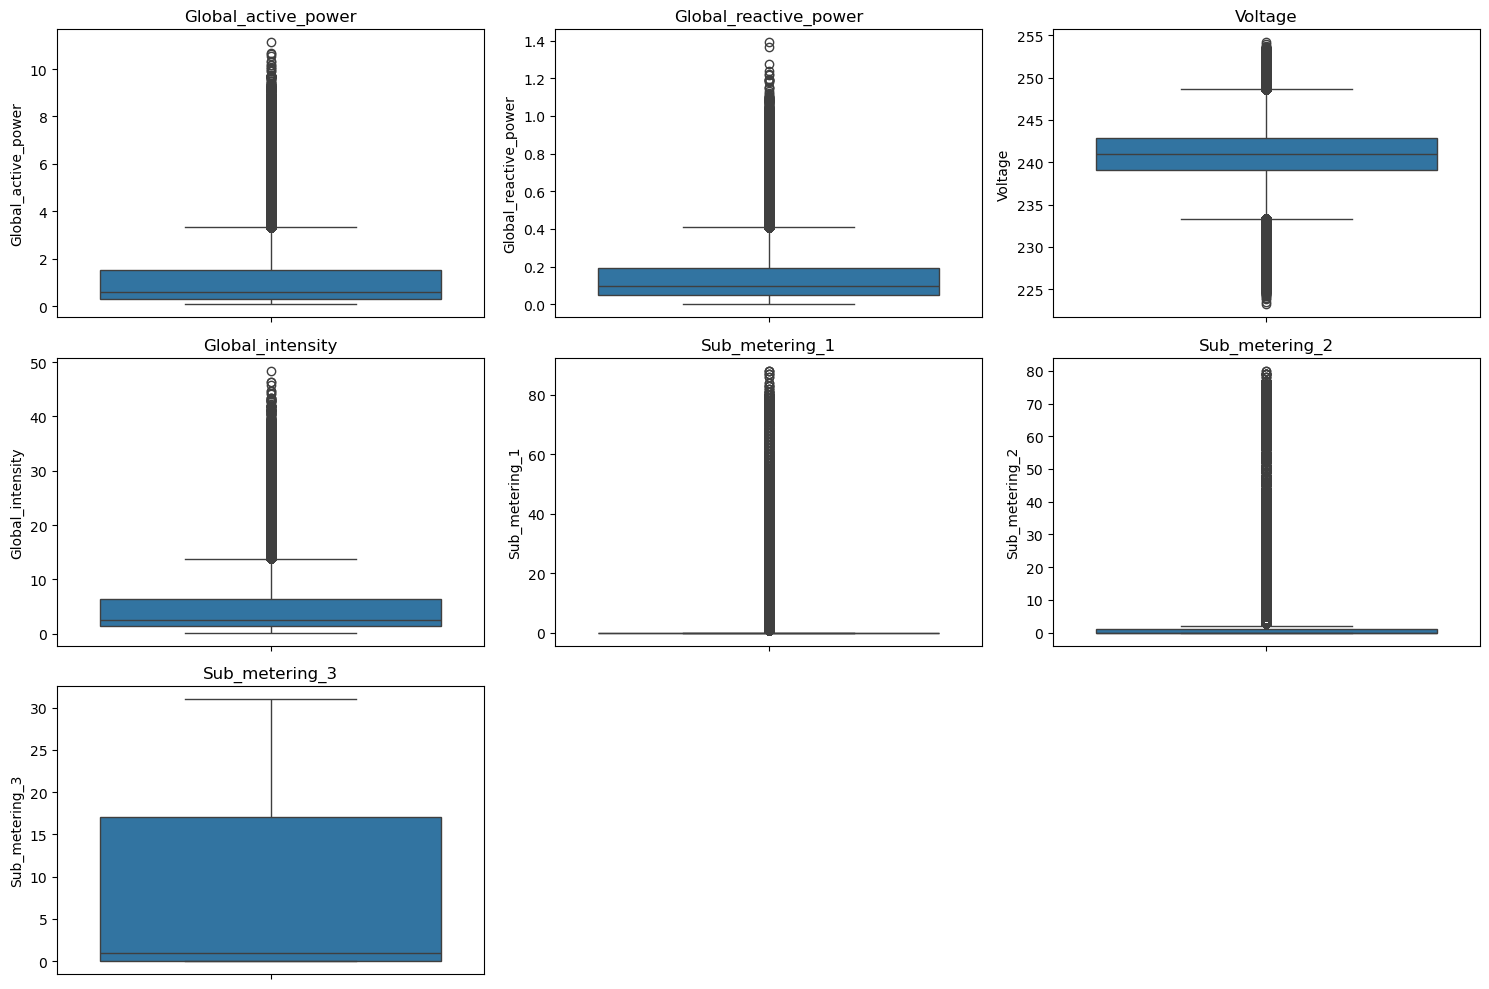

In [15]:
# box plot for outliers checking
plt.figure(figsize = (15,10))
for i , col in enumerate(numerical_columns):
  plt.subplot(3, 3, i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()


In [16]:
# Handle outliers using winsorization (limiting exttreme values )
for col in numerical_columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))


## Data Wrangling
### Subtask:
feature engineering and transformation


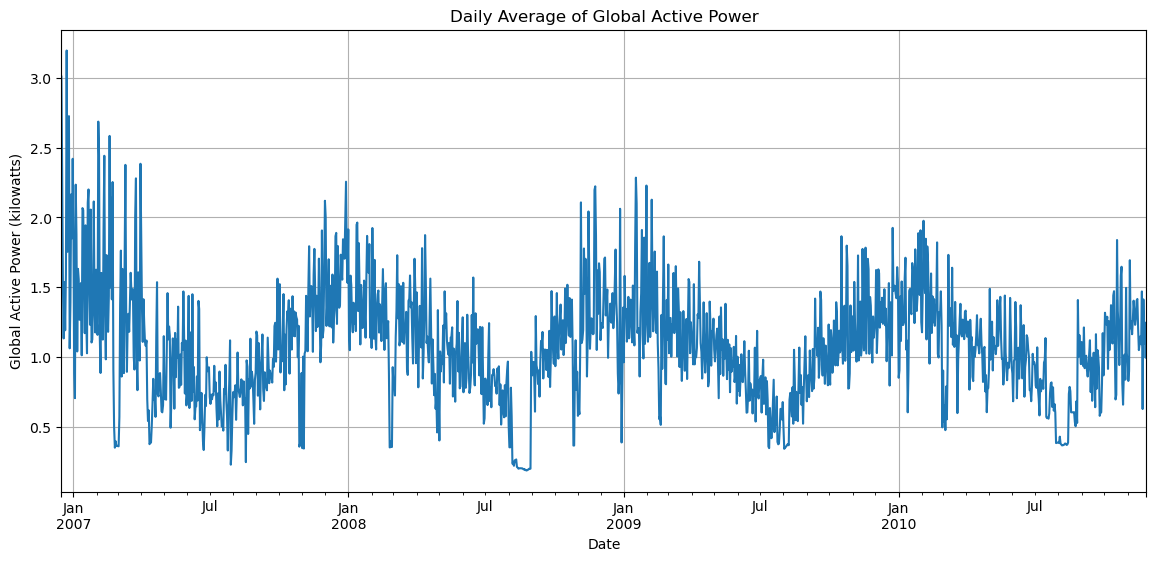

In [17]:
# Resample by day and take the average of each day
daily_avg = df['Global_active_power'].resample('D').mean()
# Plot the daily average Global_active_power
plt.figure(figsize=(14,6))
daily_avg.plot()
plt.title('Daily Average of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

In [18]:
# Feature Engineering
# Total power sonsumption
df['Total_power_consumption'] = df['Global_active_power'] + df['Global_reactive_power']

# Temporal features (from Datetime Index)
df['Hour'] = df.index.hour
df['Dayofweek'] = df.index.dayofweek  # (0 = monday ,6 = sunday )
df['Month'] = df.index.month
df['Dayofmonth']= df.index.day
df['Year'] = df.index.year
df['Minuteofhour'] = df.index.minute


# Week of Year
df['Week_of_Year'] = df.index.isocalendar().week.astype(int)

# Quarter of Year
df['Quarter'] = df.index.quarter

# Is Weekend (binary flag)
df['Is_Weekend'] = (df.index.dayofweek >= 5).astype(int) # 5=Saturday, 6=Sunday

# Is Peak Hour (example: 7-9 AM, 6-10 PM for typical households)
df['Is_Morning_Peak'] = ((df.index.hour >= 7) & (df.index.hour <= 9)).astype(int)
df['Is_Evening_Peak'] = ((df.index.hour >= 18) & (df.index.hour <= 21)).astype(int)
# Time of Day categories
def categorize_time_of_day(hour):
  if 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 18:
    return 'Afternoon'
  elif 18 <= hour < 22:
    return 'Evening'
  else:
    return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

display(df.head())


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_power_consumption,Hour,Dayofweek,Month,Dayofmonth,Year,Minuteofhour,Week_of_Year,Quarter,Is_Weekend,Is_Morning_Peak,Is_Evening_Peak,TimeOfDay
Datetime,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,4.634,17,5,12,16,2006,24,50,4,1,0,0,Afternoon
2006-12-16 17:25:00,4.838,0.436,233.63,20.6,0.0,1.0,16.0,5.274,17,5,12,16,2006,25,50,4,1,0,0,Afternoon
2006-12-16 17:26:00,4.838,0.476,233.29,20.6,0.0,2.0,17.0,5.314,17,5,12,16,2006,26,50,4,1,0,0,Afternoon
2006-12-16 17:27:00,4.838,0.476,233.74,20.6,0.0,1.0,17.0,5.314,17,5,12,16,2006,27,50,4,1,0,0,Afternoon
2006-12-16 17:28:00,3.666,0.476,235.68,15.8,0.0,1.0,17.0,4.142,17,5,12,16,2006,28,50,4,1,0,0,Afternoon


<Axes: xlabel='Hour'>

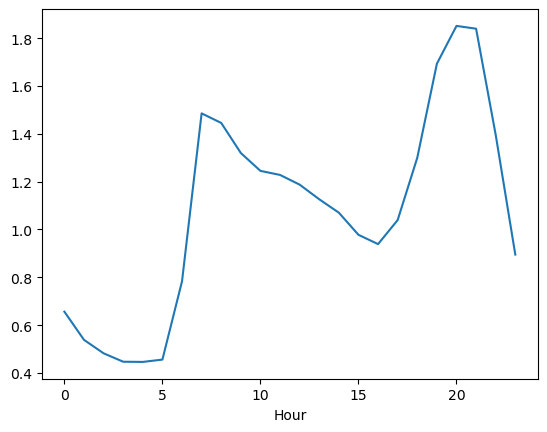

In [19]:
df.groupby('Hour')['Global_active_power'].mean().plot()

<Axes: xlabel='Dayofweek'>

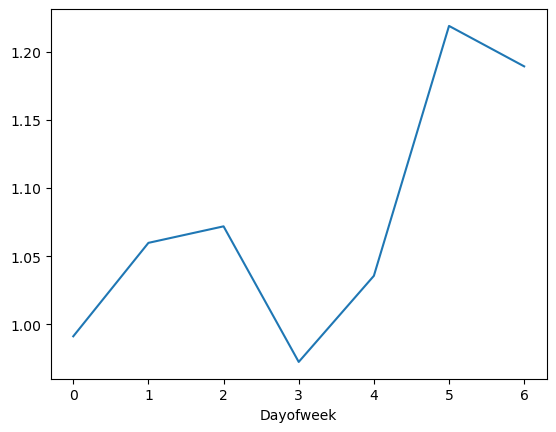

In [20]:
df.groupby('Dayofweek')['Global_active_power'].mean().plot()

<Axes: xlabel='Month'>

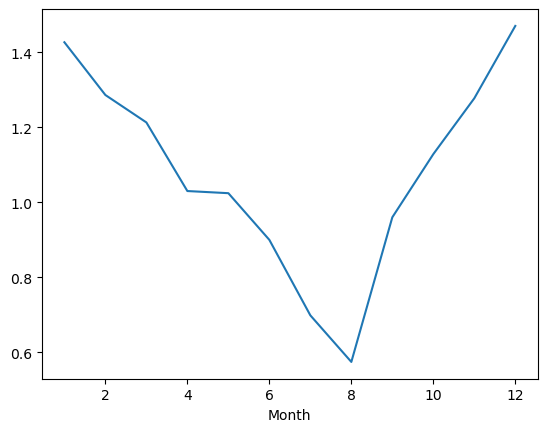

In [21]:
df.groupby('Month')['Global_active_power'].mean().plot()

<Axes: xlabel='Week_of_Year'>

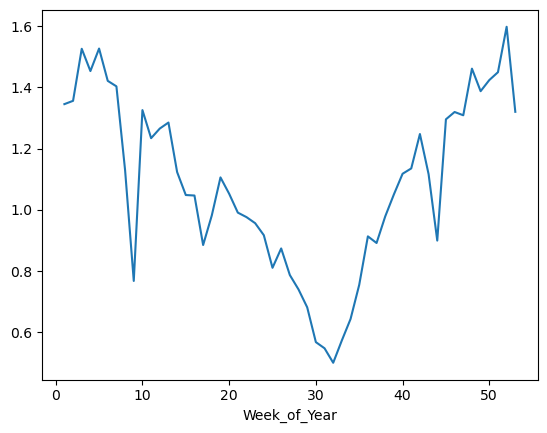

In [22]:
df.groupby('Week_of_Year')['Global_active_power'].mean().plot()

<Axes: xlabel='Dayofweek', ylabel='Hour'>

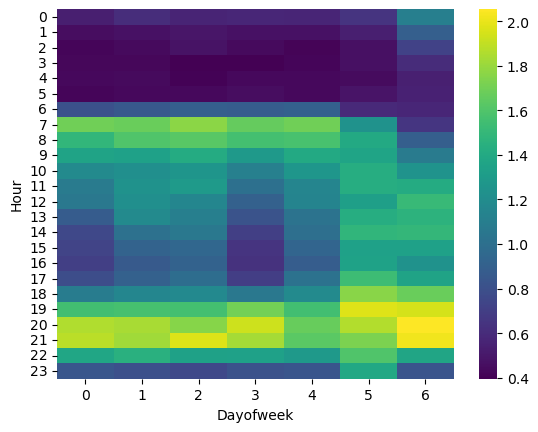

In [23]:
sns.heatmap(df.pivot_table(values='Global_active_power', index='Hour', columns='Dayofweek') , cmap = 'viridis')

In [24]:
# cyclical Temporal features  (sin and cos)

# 12 month cycle
df['sin_of_month'] = np.sin(2*np.pi*df['Month']/12)
df['cos_of_month'] = np.cos(2*np.pi*df['Month']/12)

# 24 hour cycle
df['sin_of_hour'] = np.sin(2*np.pi*df['Hour']/24)
df['cos_of_hour'] = np.cos(2*np.pi*df['Hour']/24)

# 7 day cycle
df['sin_of_day'] = np.sin(2*np.pi*df['Dayofweek']/7)
df['cos_of_day'] = np.cos(2*np.pi*df['Dayofweek']/7)

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_power_consumption,Hour,Dayofweek,...,Is_Weekend,Is_Morning_Peak,Is_Evening_Peak,TimeOfDay,sin_of_month,cos_of_month,sin_of_hour,cos_of_hour,sin_of_day,cos_of_day
Datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,4.634,17,5,...,1,0,0,Afternoon,-2.449294e-16,1.0,-0.965926,-0.258819,-0.974928,-0.222521
2006-12-16 17:25:00,4.838,0.436,233.63,20.6,0.0,1.0,16.0,5.274,17,5,...,1,0,0,Afternoon,-2.449294e-16,1.0,-0.965926,-0.258819,-0.974928,-0.222521
2006-12-16 17:26:00,4.838,0.476,233.29,20.6,0.0,2.0,17.0,5.314,17,5,...,1,0,0,Afternoon,-2.449294e-16,1.0,-0.965926,-0.258819,-0.974928,-0.222521
2006-12-16 17:27:00,4.838,0.476,233.74,20.6,0.0,1.0,17.0,5.314,17,5,...,1,0,0,Afternoon,-2.449294e-16,1.0,-0.965926,-0.258819,-0.974928,-0.222521
2006-12-16 17:28:00,3.666,0.476,235.68,15.8,0.0,1.0,17.0,4.142,17,5,...,1,0,0,Afternoon,-2.449294e-16,1.0,-0.965926,-0.258819,-0.974928,-0.222521


In [25]:
# lag features 

# Lag of Global_active_power for various relevant periods
# E.g., 1 minute ago (if predicting next minute), 1 hour ago, 24 hours ago, 1 week ago
df['GAP_Lag_1min'] = df['Global_active_power'].shift(1)
df['GAP_Lag_15min'] = df['Global_active_power'].shift(15) # 15 minutes 
df['GAP_Lag_1hour'] = df['Global_active_power'].shift(60) # 60 minutes
df['GAP_Lag_24hour'] = df['Global_active_power'].shift(60 * 24)
df['GAP_Lag_1week'] = df['Global_active_power'].shift(60 * 24 * 7)

# Lags for other potentially influencing variables
df['Voltage_Lag_1min'] = df['Voltage'].shift(1)
df['Global_intensity_Lag_1min'] = df['Global_intensity'].shift(1)
df['Sub_metering_3_Lag_1hour'] = df['Sub_metering_3'].shift(60)

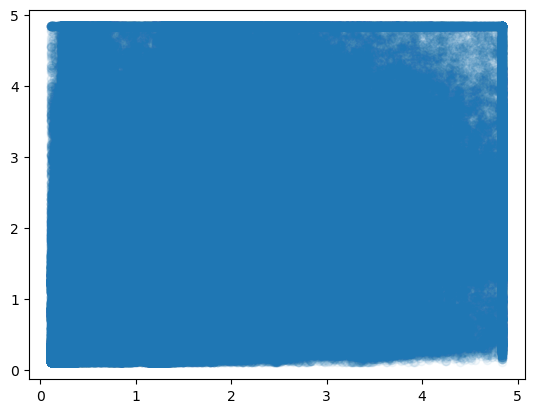

In [26]:
plt.scatter(df['GAP_Lag_1hour'], df['Global_active_power'], alpha=0.05)
plt.show()

<Axes: >

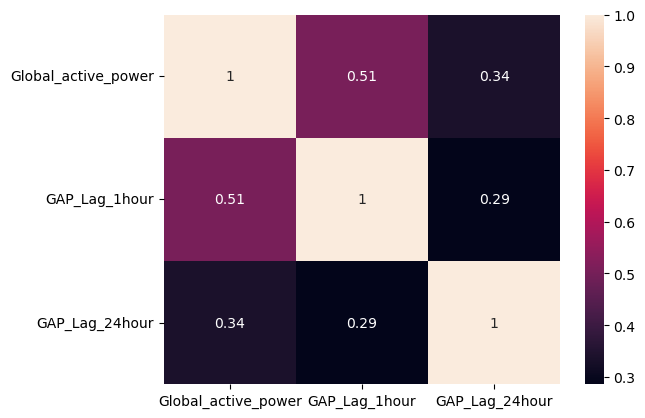

In [27]:
import seaborn as sns
sns.heatmap(df[['Global_active_power', 'GAP_Lag_1hour', 'GAP_Lag_24hour']].corr(), annot=True)


In [28]:
# Rolling Mean of Global_active_power over different windows
# 1 hour window
df['GAP_Rolling_Mean_1H'] = df['Global_active_power'].rolling(window='1H', closed='left').mean()
# 4 hour window
df['GAP_Rolling_Mean_4H'] = df['Global_active_power'].rolling(window='4H', closed='left').mean()
# 24 hour window
df['GAP_Rolling_Mean_24H'] = df['Global_active_power'].rolling(window='24H', closed='left').mean()

# Rolling Standard Deviation (volatility)
df['GAP_Rolling_Std_1H'] = df['Global_active_power'].rolling(window='1H', closed='left').std()
df['GAP_Rolling_Std_24H'] = df['Global_active_power'].rolling(window='24H', closed='left').std()

# Rolling Sum (e.g., total consumption in last X hours/minutes)
# For Sub_metering values, a rolling sum can indicate recent appliance usage
df['Sub3_Rolling_Sum_1H'] = df['Sub_metering_3'].rolling(window='1H', closed='left').sum()



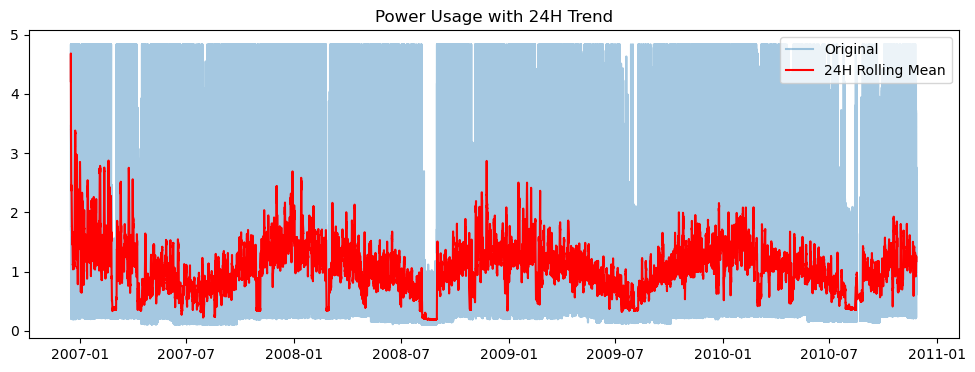

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(df['Global_active_power'], label='Original', alpha=0.4)
plt.plot(df['GAP_Rolling_Mean_24H'], label='24H Rolling Mean', color='red')
plt.title('Power Usage with 24H Trend')
plt.legend()
plt.show()


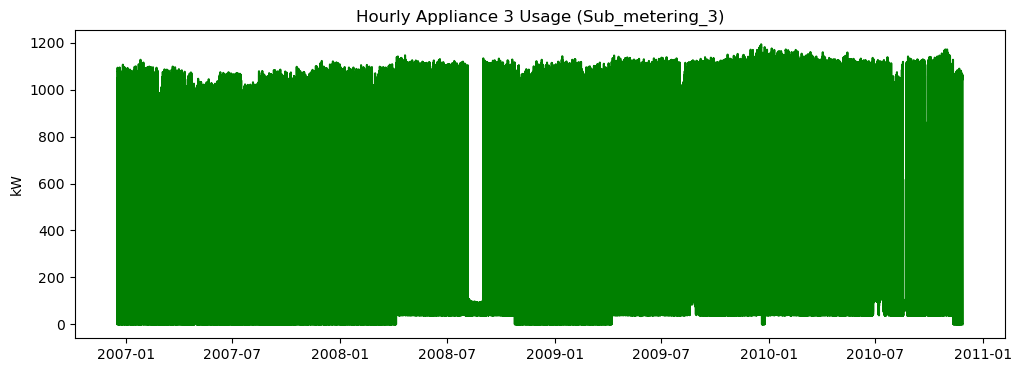

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(df['Sub3_Rolling_Sum_1H'], color='green')
plt.title('Hourly Appliance 3 Usage (Sub_metering_3)')
plt.ylabel('kW')
plt.show()


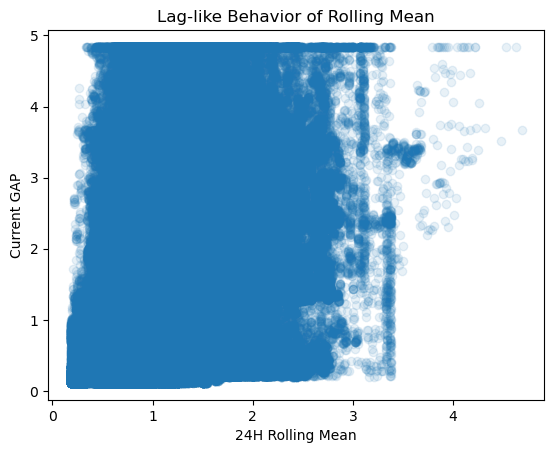

In [31]:
plt.scatter(df['GAP_Rolling_Mean_24H'], df['Global_active_power'], alpha=0.1)
plt.xlabel('24H Rolling Mean')
plt.ylabel('Current GAP')
plt.title('Lag-like Behavior of Rolling Mean')
plt.show()


Text(0.5, 1.0, 'Distribution of Global Active Power')

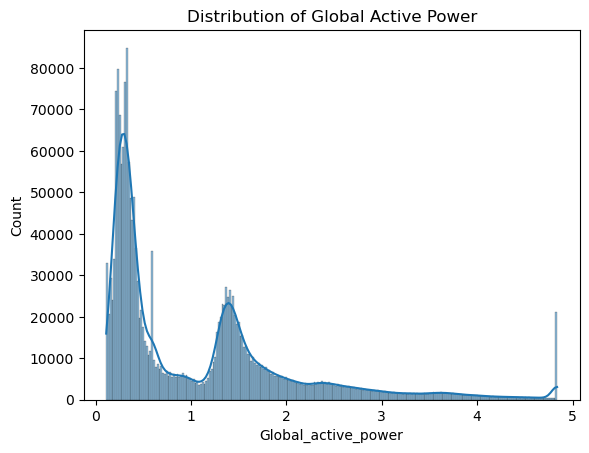

In [32]:
# features distribution  
# univaraite analysis 
# Histogram with KDE
sns.histplot(df['Global_active_power'], kde=True)
plt.title('Distribution of Global Active Power')


<Axes: xlabel='Voltage', ylabel='Global_active_power'>

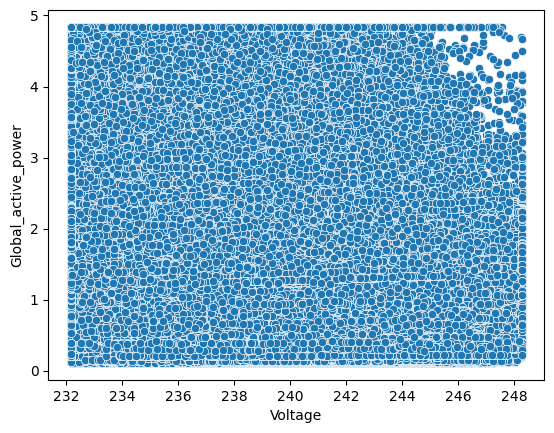

In [33]:
# Bivaraite analysis 
# Voltage vs GAP
sns.scatterplot(x='Voltage', y='Global_active_power', data=df)

<Axes: xlabel='Is_Weekend', ylabel='Global_active_power'>

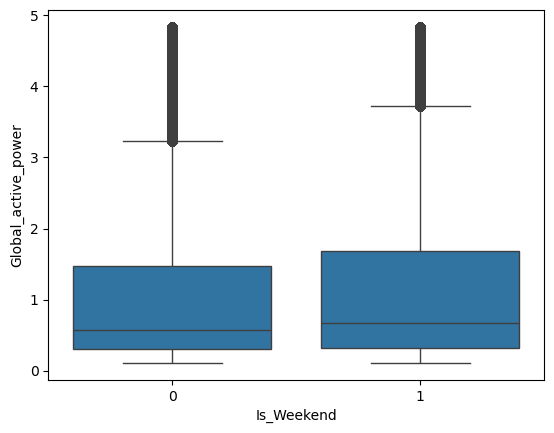

In [34]:
# Is Weekend vs GAP (Assume you’ve defined Is_Weekend flag)
sns.boxplot(x='Is_Weekend', y='Global_active_power', data=df)

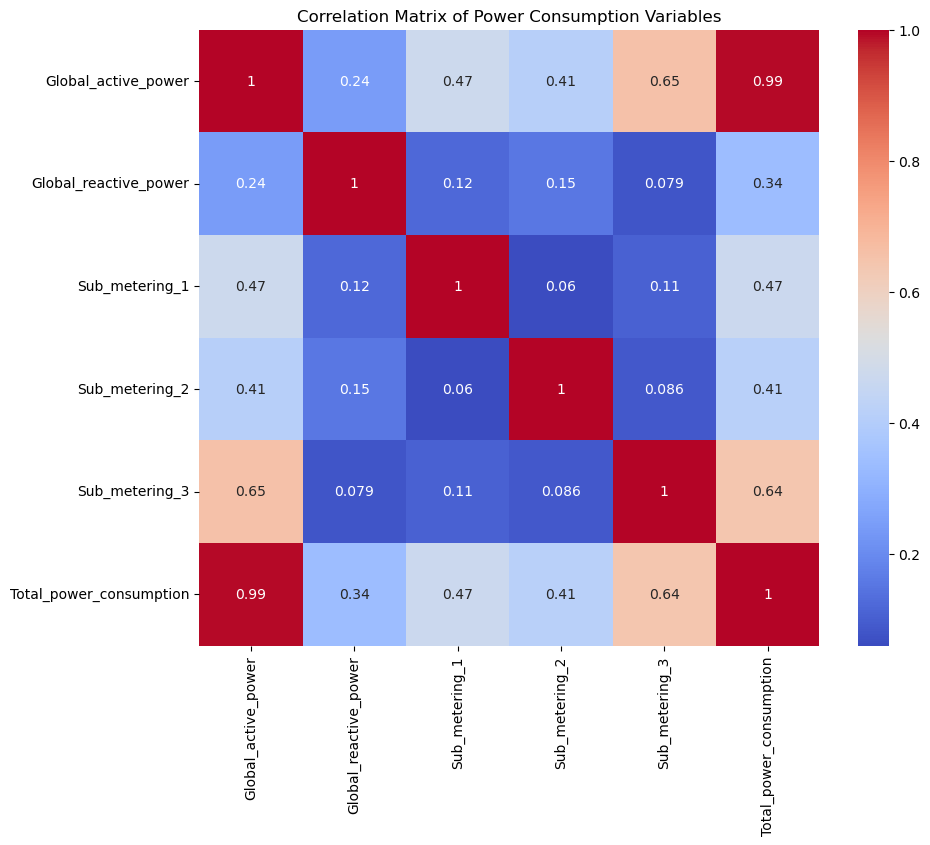

In [35]:

#  Correlations between Power Consumption Variables
power_cols = ['Global_active_power', 'Global_reactive_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_power_consumption']
correlation_matrix = df[power_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Power Consumption Variables')
plt.show()

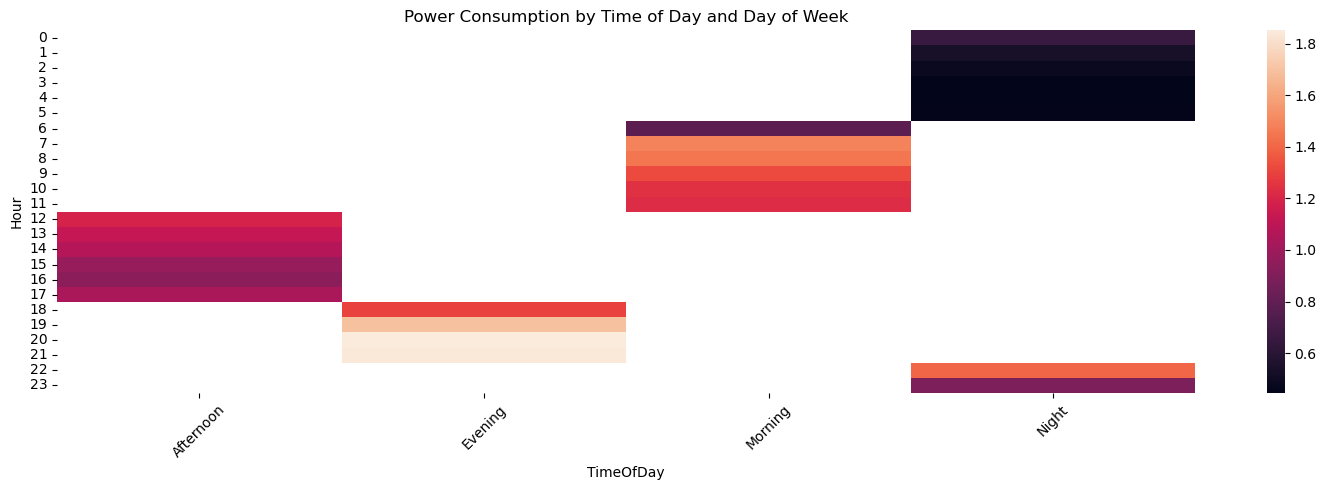


Descriptive Statistics of Power Consumption by Time of Day:
               count      mean       std    min    25%    50%    75%    max
TimeOfDay                                                                 
Afternoon  518796.0  1.188574  1.018866  0.112  0.430  0.780  1.632  5.314
Evening    346023.0  1.823005  1.283688  0.112  0.702  1.610  2.602  5.314
Morning    518760.0  1.362647  0.975986  0.112  0.504  1.374  1.778  5.314
Night      691680.0  0.773273  0.750185  0.112  0.328  0.484  0.872  5.314


In [36]:
# 4. Power Consumption Patterns by Time of Day
plt.figure(figsize=(15, 5))
sns.heatmap(df.pivot_table(  values='Global_active_power',index='Hour', columns='TimeOfDay', aggfunc='mean'))
plt.title('Power Consumption by Time of Day and Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics of Power Consumption by Time of Day:\n", df.groupby('TimeOfDay')['Total_power_consumption'].describe())

### Data prepare for modeling

In [37]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from  sklearn.metrics import mean_squared_error, r2_score

In [38]:
df.columns


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Total_power_consumption', 'Hour', 'Dayofweek',
       'Month', 'Dayofmonth', 'Year', 'Minuteofhour', 'Week_of_Year',
       'Quarter', 'Is_Weekend', 'Is_Morning_Peak', 'Is_Evening_Peak',
       'TimeOfDay', 'sin_of_month', 'cos_of_month', 'sin_of_hour',
       'cos_of_hour', 'sin_of_day', 'cos_of_day', 'GAP_Lag_1min',
       'GAP_Lag_15min', 'GAP_Lag_1hour', 'GAP_Lag_24hour', 'GAP_Lag_1week',
       'Voltage_Lag_1min', 'Global_intensity_Lag_1min',
       'Sub_metering_3_Lag_1hour', 'GAP_Rolling_Mean_1H',
       'GAP_Rolling_Mean_4H', 'GAP_Rolling_Mean_24H', 'GAP_Rolling_Std_1H',
       'GAP_Rolling_Std_24H', 'Sub3_Rolling_Sum_1H'],
      dtype='object')

In [39]:
selected_features = [
    # 🌟 Original measured features (raw sensors)
    'Voltage',
    'Global_intensity',
    'Global_reactive_power', 
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    

    # ⏪ Lag features
    'GAP_Lag_1hour',
    'GAP_Lag_24hour',
    'GAP_Lag_1week',
    'Voltage_Lag_1min',
    'Global_intensity_Lag_1min',
    'Sub_metering_3_Lag_1hour',

    # 🔁 Rolling features (trend and volatility)
    'GAP_Rolling_Mean_1H',
    'GAP_Rolling_Mean_4H',
    'GAP_Rolling_Mean_24H',
    'GAP_Rolling_Std_1H',
    'GAP_Rolling_Std_24H',
    'Sub3_Rolling_Sum_1H',

    # 🔄 Cyclical time features
    'sin_of_month',
    'cos_of_month',
    'sin_of_hour',
    'cos_of_hour',
    'sin_of_day',
    'cos_of_day',

    # 📆 Categorical time flags
    'Is_Weekend',
    'Is_Morning_Peak',
    'Is_Evening_Peak'
]
[f for f in selected_features if f in df.columns]


['Voltage',
 'Global_intensity',
 'Global_reactive_power',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'GAP_Lag_1hour',
 'GAP_Lag_24hour',
 'GAP_Lag_1week',
 'Voltage_Lag_1min',
 'Global_intensity_Lag_1min',
 'Sub_metering_3_Lag_1hour',
 'GAP_Rolling_Mean_1H',
 'GAP_Rolling_Mean_4H',
 'GAP_Rolling_Mean_24H',
 'GAP_Rolling_Std_1H',
 'GAP_Rolling_Std_24H',
 'Sub3_Rolling_Sum_1H',
 'sin_of_month',
 'cos_of_month',
 'sin_of_hour',
 'cos_of_hour',
 'sin_of_day',
 'cos_of_day',
 'Is_Weekend',
 'Is_Morning_Peak',
 'Is_Evening_Peak']

In [40]:
df[selected_features].isnull().sum()

Voltage                          0
Global_intensity                 0
Global_reactive_power            0
Sub_metering_1                   0
Sub_metering_2                   0
Sub_metering_3                   0
GAP_Lag_1hour                   60
GAP_Lag_24hour                1440
GAP_Lag_1week                10080
Voltage_Lag_1min                 1
Global_intensity_Lag_1min        1
Sub_metering_3_Lag_1hour        60
GAP_Rolling_Mean_1H              1
GAP_Rolling_Mean_4H              1
GAP_Rolling_Mean_24H             1
GAP_Rolling_Std_1H               2
GAP_Rolling_Std_24H              2
Sub3_Rolling_Sum_1H              1
sin_of_month                     0
cos_of_month                     0
sin_of_hour                      0
cos_of_hour                      0
sin_of_day                       0
cos_of_day                       0
Is_Weekend                       0
Is_Morning_Peak                  0
Is_Evening_Peak                  0
dtype: int64

In [41]:
df.dropna(inplace = True)

In [42]:
df[selected_features].isnull().sum().any()

False

In [43]:
x = df[selected_features]
y = df['Global_active_power']

In [44]:
# split the data into training and testing sets
X_train ,X_test ,y_train , y_test = train_test_split(x ,y ,test_size = 0.2 , random_state = 42 ,shuffle = False )

In [45]:
# Scale features (important for some models like Linear Regression and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression (Train):
  RMSE: 0.0389
  MAE:  0.0251
  R²:   0.9986
----------------------------------------
Linear Regression (Test):
  RMSE: 0.0384
  MAE:  0.0236
  R²:   0.9980
----------------------------------------
Decison Tree (Train):
  RMSE: 0.0000
  MAE:  0.0000
  R²:   1.0000
----------------------------------------
Decison Tree (Test):
  RMSE: 0.0402
  MAE:  0.0239
  R²:   0.9978
----------------------------------------
Random Forest (Train):
  RMSE: 0.0084
  MAE:  0.0037
  R²:   0.9999
----------------------------------------
Random Forest (Test):
  RMSE: 0.0294
  MAE:  0.0176
  R²:   0.9988
----------------------------------------
Gradient Boosting (Train):
  RMSE: 0.0314
  MAE:  0.0195
  R²:   0.9991
----------------------------------------
Gradient Boosting (Test):
  RMSE: 0.0316
  MAE:  0.0202
  R²:   0.9986
----------------------------------------


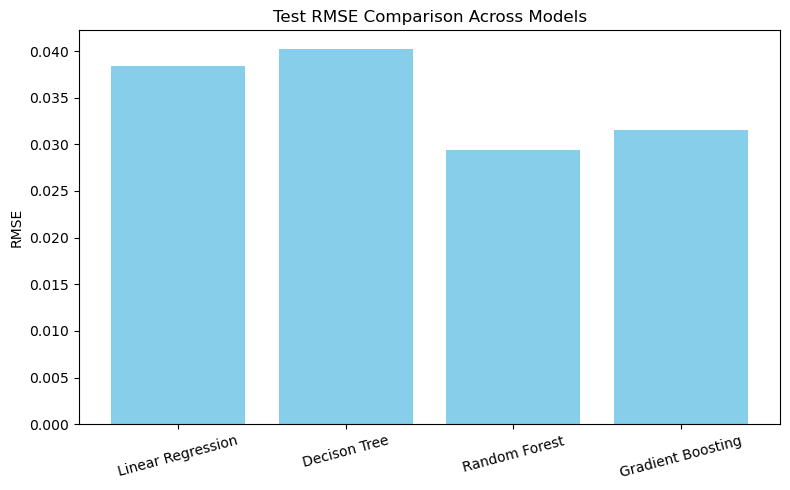

In [46]:


# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decison Tree" : DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Evaluation function to print metrics
def evaluate_model(name, y_true, y_pred, dataset_type):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} ({dataset_type}):")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print("-" * 40)
    return rmse

#  Loop through each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate on Train
    y_train_pred = model.predict(X_train_scaled)
    evaluate_model(name, y_train, y_train_pred, dataset_type="Train")

    # Evaluate on Test
    y_test_pred = model.predict(X_test_scaled)
    rmse_test = evaluate_model(name, y_test, y_test_pred, dataset_type="Test")

    # Store test RMSE for chart
    results[name] = rmse_test

#  Visualize RMSE across models
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Test RMSE Comparison Across Models")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# other way 

In [37]:
features = [
    # 🌟 Original measured features (raw sensors)
    'Voltage',
    'Global_intensity',
    'Global_reactive_power', 
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',

    # 🔄 Cyclical time features
    'sin_of_month',
    'cos_of_month',
    'sin_of_hour',
    'cos_of_hour',
    'sin_of_day',
    'cos_of_day',

    # 📆 Categorical time flags
    'Is_Weekend',
    'Is_Morning_Peak',
    'Is_Evening_Peak'
]
[f for f in features if f in df.columns]


['Voltage',
 'Global_intensity',
 'Global_reactive_power',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'sin_of_month',
 'cos_of_month',
 'sin_of_hour',
 'cos_of_hour',
 'sin_of_day',
 'cos_of_day',
 'Is_Weekend',
 'Is_Morning_Peak',
 'Is_Evening_Peak']

In [38]:
df[features].isnull().sum().any()

False

In [39]:
x = df[features]
y = df['Global_active_power']

In [42]:
# split the data into training and testing sets
X_train ,X_test ,y_train , y_test = train_test_split(x ,y ,test_size = 0.2 , random_state = 42 ,shuffle = False )

In [43]:
# Scale features (important for some models like Linear Regression and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression (Train):
  RMSE: 0.0395
  MAE:  0.0255
  R²:   0.9986
----------------------------------------
Linear Regression (Test):
  RMSE: 0.0389
  MAE:  0.0241
  R²:   0.9980
----------------------------------------
Decison Tree (Train):
  RMSE: 0.0012
  MAE:  0.0001
  R²:   1.0000
----------------------------------------
Decison Tree (Test):
  RMSE: 0.0461
  MAE:  0.0269
  R²:   0.9971
----------------------------------------
Random Forest (Train):
  RMSE: 0.0095
  MAE:  0.0044
  R²:   0.9999
----------------------------------------
Random Forest (Test):
  RMSE: 0.0326
  MAE:  0.0204
  R²:   0.9986
----------------------------------------
Gradient Boosting (Train):
  RMSE: 0.0331
  MAE:  0.0202
  R²:   0.9990
----------------------------------------
Gradient Boosting (Test):
  RMSE: 0.0323
  MAE:  0.0208
  R²:   0.9986
----------------------------------------
Neural Network (Train):
  RMSE: 0.0291
  MAE:  0.0182
  R²:   0.9992
----------------------------------------
Neural N

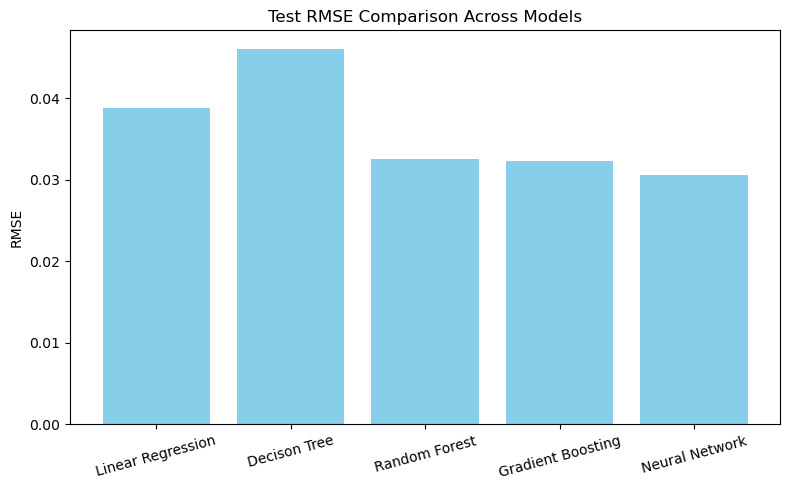

In [44]:
# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decison Tree" : DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                                   learning_rate_init=0.001, max_iter=500, random_state=42)
    
}

#  Evaluation function to print metrics
def evaluate_model(name, y_true, y_pred, dataset_type):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} ({dataset_type}):")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print("-" * 40)
    return rmse

#  Loop through each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate on Train
    y_train_pred = model.predict(X_train_scaled)
    evaluate_model(name, y_train, y_train_pred, dataset_type="Train")

    # Evaluate on Test
    y_test_pred = model.predict(X_test_scaled)
    rmse_test = evaluate_model(name, y_test, y_test_pred, dataset_type="Test")

    # Store test RMSE for chart
    results[name] = rmse_test

#  Visualize RMSE across models
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Test RMSE Comparison Across Models")
plt.ylabel("RMSE")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [45]:
import joblib

joblib.dump(models["Neural Network"],"neural_network_model.pkl")

['neural_network_model.pkl']